In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
start = '2000-01-01'
end = '2023-12-31'

df = yf.download("AAPL", start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [7]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [8]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.936384,1.004464,0.907924,0.999442,0.846127,535796800
1,2000-01-04,0.966518,0.987723,0.903460,0.915179,0.774790,512377600
2,2000-01-05,0.926339,0.987165,0.919643,0.928571,0.786128,778321600
3,2000-01-06,0.947545,0.955357,0.848214,0.848214,0.718098,767972800
4,2000-01-07,0.861607,0.901786,0.852679,0.888393,0.752113,460734400


In [9]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400


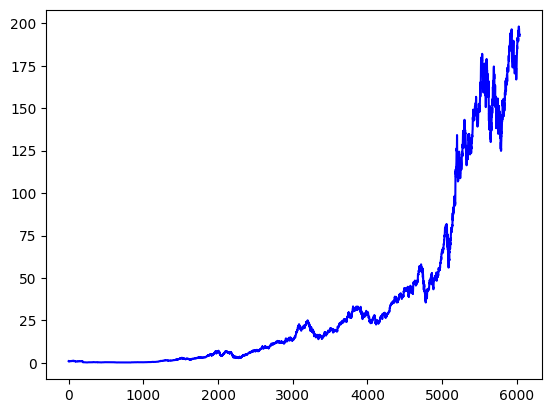

In [10]:
plt.plot(df.Close, 'b')

In [11]:
df

,Open,High,Low,Close,Volume
0,0.936384,1.004464,0.907924,0.999442,535796800
1,0.966518,0.987723,0.903460,0.915179,512377600
2,0.926339,0.987165,0.919643,0.928571,778321600
3,0.947545,0.955357,0.848214,0.848214,767972800
4,0.861607,0.901786,0.852679,0.888393,460734400
...,...,...,...,...,...
6032,195.179993,195.410004,192.970001,193.600006,37122800
6033,193.610001,193.889999,192.830002,193.050003,28919300
6034,192.490005,193.500000,191.089996,193.149994,48087700
6035,194.139999,194.660004,193.169998,193.580002,34049900


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6032    181.768301
6033    181.787101
6034    181.898701
6035    182.046001
6036    182.173301
Name: Close, Length: 6037, dtype: float64

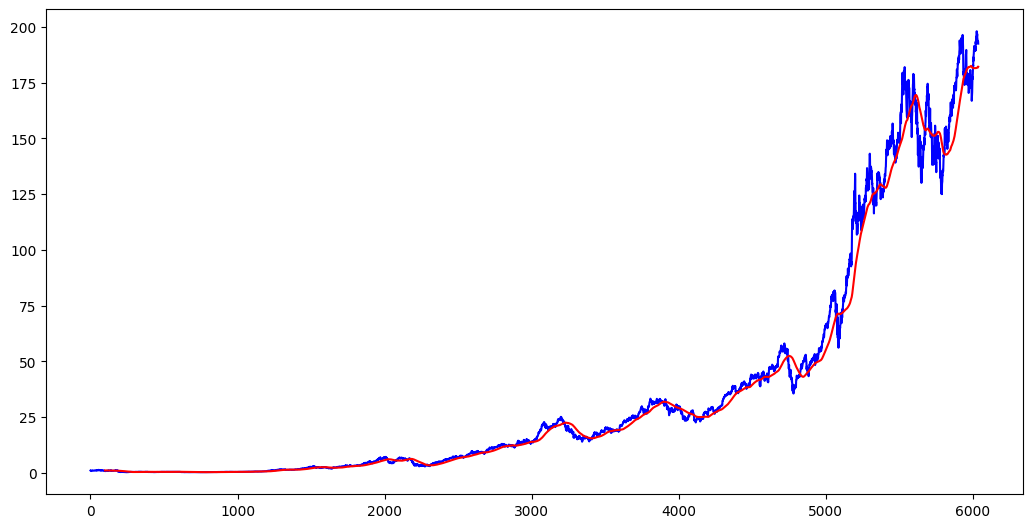

In [13]:
plt.figure(figsize=(12.6, 6.3))  

plt.plot(df.Close, 'b')
plt.plot(ma100, 'r')

plt.show()

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
6032    178.649100
6033    178.871851
6034    179.085250
6035    179.290201
6036    179.487900
Name: Close, Length: 6037, dtype: float64

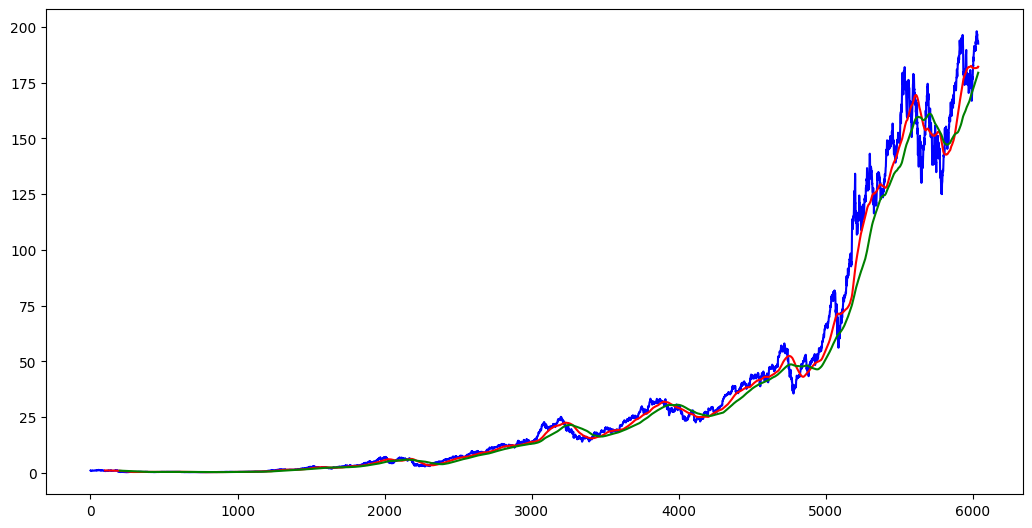

In [15]:
plt.figure(figsize=(12.6, 6.3))  

plt.plot(df.Close, 'b')
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

plt.show()

In [16]:
df.shape

(6037, 5)

# Splitting Data into Training and Testing

In [17]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)                             

(4225, 1)
(1812, 1)


In [18]:
data_training.head()

,Close
0,0.999442
1,0.915179
2,0.928571
3,0.848214
4,0.888393


In [19]:
data_testing.head()

,Close
4225,29.367500
4226,29.280001
4227,29.264999
4228,29.150000
4229,29.412500


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [21]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02317551],
       [0.0206233 ],
       [0.02102893],
       ...,
       [0.87869415],
       [0.88361601],
       [0.88301028]])

In [22]:
data_training_array.shape

(4225, 1)

In [23]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(4125, 100, 1)

# ML Model

In [26]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)


Epoch 1/50

129/129 [==============================] - 28s 176ms/step - loss: 0.0190
Epoch 2/50
129/129 [==============================] - 19s 148ms/step - loss: 0.0051
Epoch 3/50
129/129 [==============================] - 19s 144ms/step - loss: 0.0046
Epoch 4/50
129/129 [==============================] - 19s 150ms/step - loss: 0.0043
Epoch 5/50
129/129 [==============================] - 20s 158ms/step - loss: 0.0039
Epoch 6/50
129/129 [==============================] - 18s 143ms/step - loss: 0.0035
Epoch 7/50
129/129 [==============================] - 19s 145ms/step - loss: 0.0035
Epoch 8/50
129/129 [==============================] - 20s 158ms/step - loss: 0.0032
Epoch 9/50
129/129 [==============================] - 19s 146ms/step - loss: 0.0033
Epoch 10/50
129/129 [==============================] - 20s 156ms/step - loss: 0.0029
Epoch 11/50
129/129 [==============================] - 19s 145ms/step - loss: 0.0034
Epoch 12/50
129/129 [==============================] - 22s 168ms/step - 